<a href="https://colab.research.google.com/github/BrainyNBright/AI-Internship-2022/blob/main/Intern_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing tensorflow version 2.0
!pip install tensorflow==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 40 kB/s 
     |████████████████████████████████| 449 kB 45.1 MB/s 
     |████████████████████████████████| 3.8 MB 33.2 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=eb1398d07ba5969369275d594c95ab3fefcae340a534616e77a685040beb325e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uni

In [ ]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [ ]:
#styling purpose
!pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 28.1 MB/s 
     |████████████████████████████████| 9.9 MB 32.8 MB/s 
     |████████████████████████████████| 46 kB 602 kB/s 
     |████████████████████████████████| 1.6 MB 43.7 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 59 kB 6.7 MB/s 
     |████████████████████████████████| 423 kB 50.9 MB/s 
     |████████████████████████████████| 86 kB 2.8 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [ ]:
#Load the training and testing datasets
insta_df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
insta_df_train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
#the dataset which will be used for training purpose (576 rows)
print(insta_df_train)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length

In [ ]:
#the dataset which will be used for testing purpose (120 records)
print(insta_df_test)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     name==username  description length

EXPLOROTARY DATA ANALYSIS FOR TRIANIGN DATASET

In [ ]:
#Getting dataset info
insta_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
#Statistical summary of the dataset
insta_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
#Number of unique values in the profile pic column
insta_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [ ]:
#Number of Fake and real accounts in the dataset
insta_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

In [ ]:
#Number of accounts having an external URL
insta_df_train['external URL'].value_counts()

0    509
1     67
Name: external URL, dtype: int64

EXPLORATORY DATA ANALYSIS FOR TESTING DATASET 

In [ ]:
insta_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
insta_df_test.describe

<bound method NDFrame.describe of      profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     

In [ ]:
insta_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
insta_df_test['fake'].value_counts()

0    60
1    60
Name: fake, dtype: int64

CORRELTAION HEATMAP

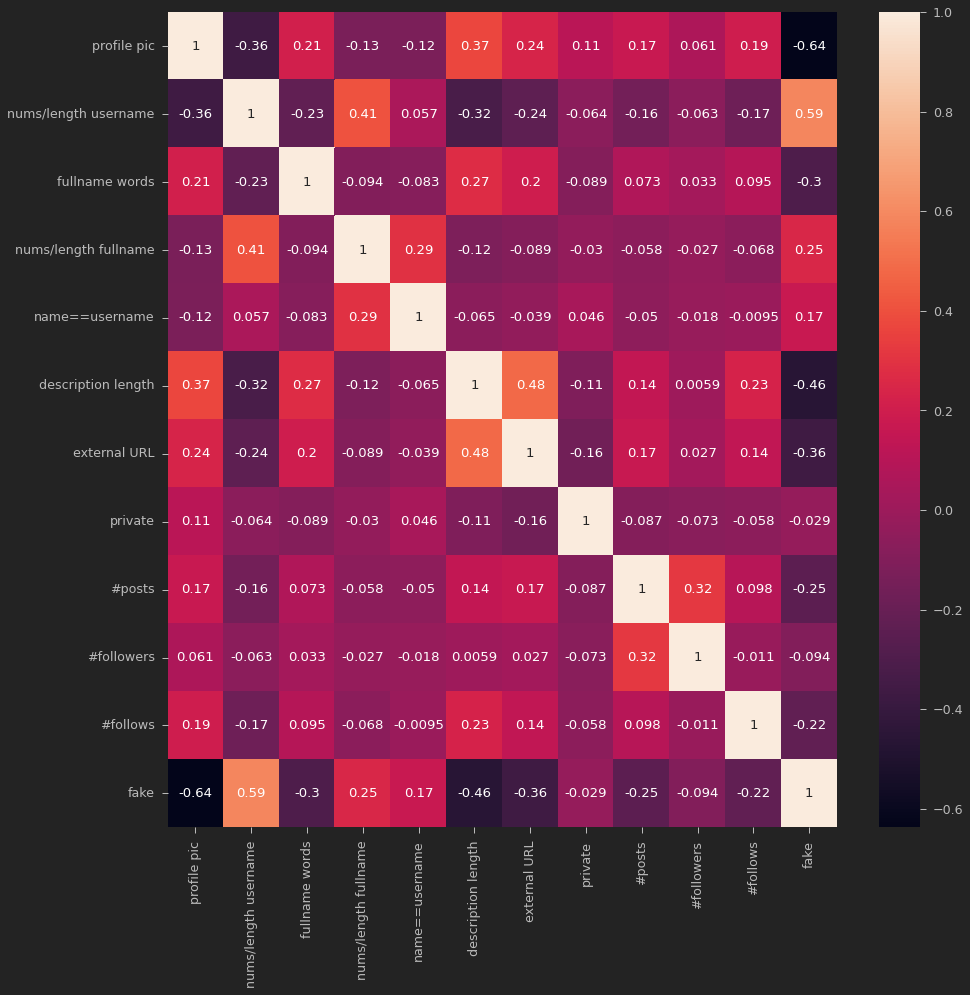

In [ ]:
plt.figure(figsize=(15,15))
cm = insta_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

DATA PREPARATION

In [ ]:
#Preparing inputs for the model (Dropping the fake column from both training and testing dataset)
x_train = insta_df_train.drop(columns = ['fake'])
x_test = insta_df_test.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [43]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_train = insta_df_train['fake']
y_test = insta_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
#Having a look at the shapes after scaling the data
print(X_train.shape,X_test.shape)

(576, 11) (120, 11)


In [ ]:
print(Y_train.shape,Y_test.shape)

(576, 2) (120, 2)


MODEL BUILDING

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
#Building the main model

model = Sequential() 
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3775      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 5

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, Y_train, epochs = 1000, verbose = 1, validation_split = 0.1)

Train on 518 samples, validate on 58 samples
Epoch 1/1000
518/518 [==============================] - 2s 4ms/sample - loss: 0.7148 - accuracy: 0.5618 - val_loss: 0.4629 - val_accuracy: 0.7931
Epoch 2/1000
518/518 [==============================] - 0s 146us/sample - loss: 0.5094 - accuracy: 0.8224 - val_loss: 0.3766 - val_accuracy: 0.7931
Epoch 3/1000
518/518 [==============================] - 0s 212us/sample - loss: 0.3920 - accuracy: 0.8591 - val_loss: 0.3130 - val_accuracy: 0.8103
Epoch 4/1000
518/518 [==============================] - 0s 194us/sample - loss: 0.3472 - accuracy: 0.8861 - val_loss: 0.2794 - val_accuracy: 0.8621
Epoch 5/1000
518/518 [==============================] - 0s 247us/sample - loss: 0.2980 - accuracy: 0.8958 - val_loss: 0.2450 - val_accuracy: 0.8966
Epoch 6/1000
518/518 [==============================] - 0s 274us/sample - loss: 0.2752 - accuracy: 0.8938 - val_loss: 0.2396 - val_accuracy: 0.8966
Epoch 7/1000
518/518 [==============================] - 0s 257us/samp

In [ ]:
model.evaluate(X_test, Y_test)

120/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.6307708024978638, 0.8666667]

PERFORMANCE OF THE MODEL


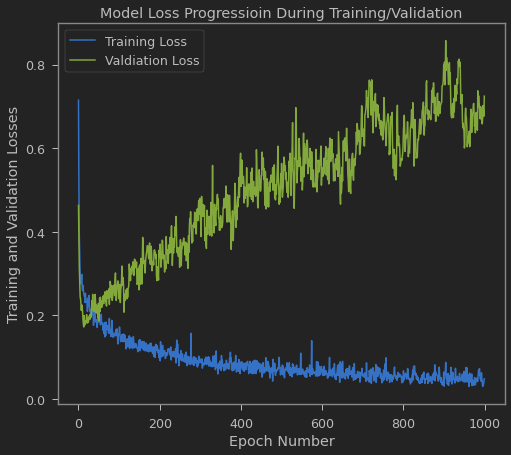

In [ ]:
#Confusion Matrix
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

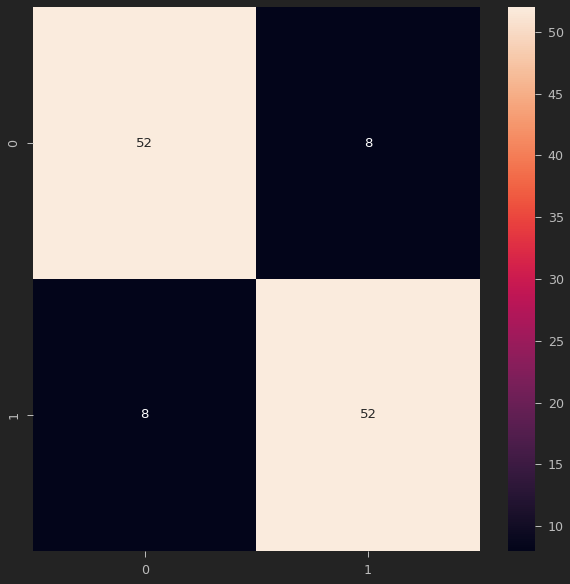

In [44]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [ ]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        60
           1       0.87      0.87      0.87        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120

